# Linear Regression vs Ridge Regression
#### Find the relationships between the bike-store sharing data and the amount of bike rentals.

### Linear Regression
* Linear regression finds a function that relates a continuous dependent variable "y" to some predictors (independent variables x_1, x_2, etc.). For example, simple linear regression assumes a function of the form:
- - y = theta_0 + theta_1  x_1 + theta_2  x_2 + ...
* and finds the values of parameters theta_0, theta_1, theta_2, etc, where the term theta_0 is the "intercept". 
* When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. Ridge regression solves this particular issue.
### Ridge Regression
* PROS: Deals with data that suffers from multicollinearity.
* Multicollinearity: Two or more independent variables are HIGHLY correlated.
* Similarly to Linear Regression, predicts a continuous dependent variable "y" learning from the predictors (independent variables) also called coefficients.
* By using L2 Regularization, it aims to reducing overfitting and tries to correct these coefficients by adding a parameter "alpha".
* At the same time, deals better with outliers that cause high values of the coefficients, since with alpha we can correct for extremly high coefficients.
* Alpha: Hyperparameter established beforehand. If its value is very high, there is risk of nulling out the coefficients to 0.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# load the training dataset
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_df = pd.read_csv('../../DATA/daily-bike-share.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82



The data consists of the following columns:

- instant: A unique row identifier
- dteday: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.
- season: A numerically encoded value indicating the season (1:winter, 2:spring, 3:summer, 4:fall)
- yr: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)
- mnth: The calendar month in which the observation was made (1:January ... 12:December)
- holiday: A binary value indicating whether or not the observation was made on a public holiday)
- weekday: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
- workingday: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
- weathersit: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
- temp: The temperature in celsius (normalized)
- atemp: The apparent ("feels-like") temperature in celsius (normalized)
- hum: The humidity level (normalized)
- windspeed: The windspeed (normalized)
- rentals: The number of bicycle rentals recorded.
In this dataset, rentals represents the label (the y value) our model must be trained to predict. The other columns are potential features (x values).

In [3]:
## Let's add one column named Day, with the day of the date.
bike_df["Day"] = pd.DatetimeIndex(bike_df["dteday"]).day
bike_df.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,Day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1


## Exploratory Data Analysis - Statistically

In [4]:
bike_df.dtypes.value_counts()

int64      10
float64     4
object      1
dtype: int64

There seem to be no categorical value, however, they could be masked with an integer like in a "rank" or "weekday"


In [5]:
## Describe method
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_df[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


* All features are normalized in between the same range.
* We can see a wide standard deviation in the rentals attribute, indicating a wide variance in rental amount per day.
* As well as a big difference between max and min number of rentals.

So, let's explore the rentals attribute a bit further

Text(0.5, 0.98, 'Rental Distribution')

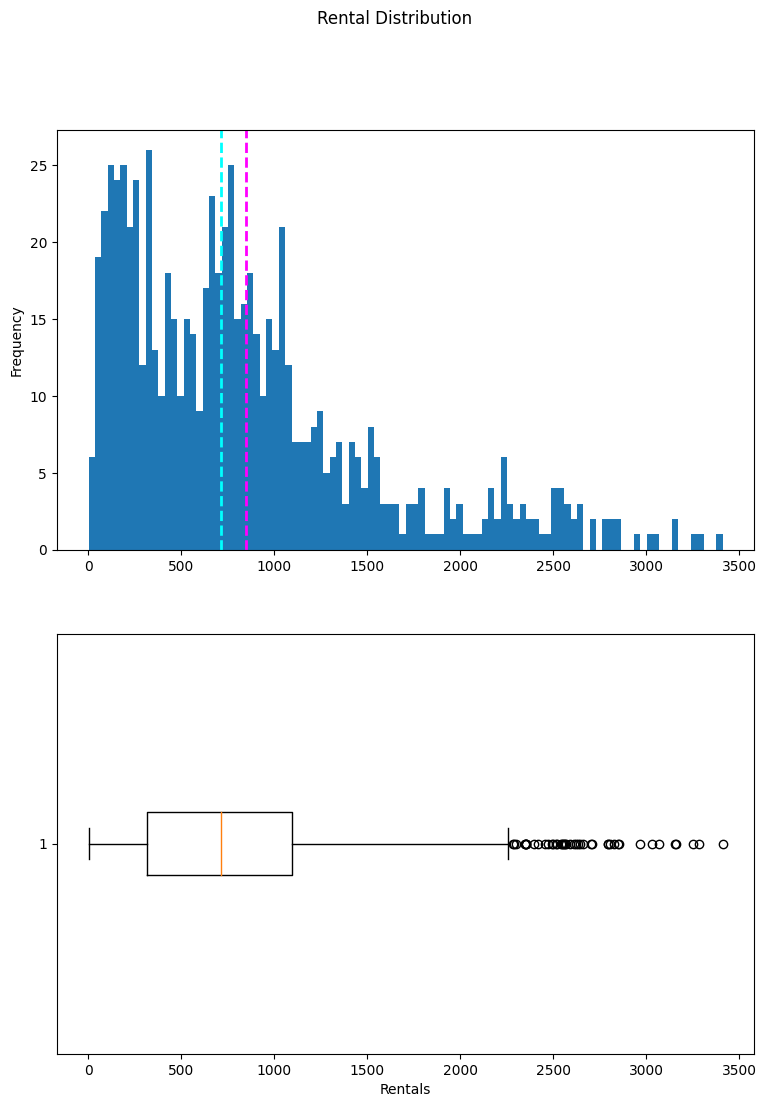

In [6]:
rentals = bike_df["rentals"]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(rentals, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(rentals.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(rentals.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(rentals, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the Figure
fig.suptitle('Rental Distribution')

The plots show that the number of daily rentals ranges from 0 to just over 3,400. However, the mean (and median) number of daily rentals is closer to the low end of that range, with most of the data between 0 and around 2,200 rentals. The few values above this are shown in the box plot as small circles, indicating that they are outliers - in other words, unusually high or low values beyond the typical range of most of the data.

## Let's check all numeric attributes distribution
##### - If mean > median, distribution is skewed to the right.
##### - If mean < median, distribution is skewed to the left.

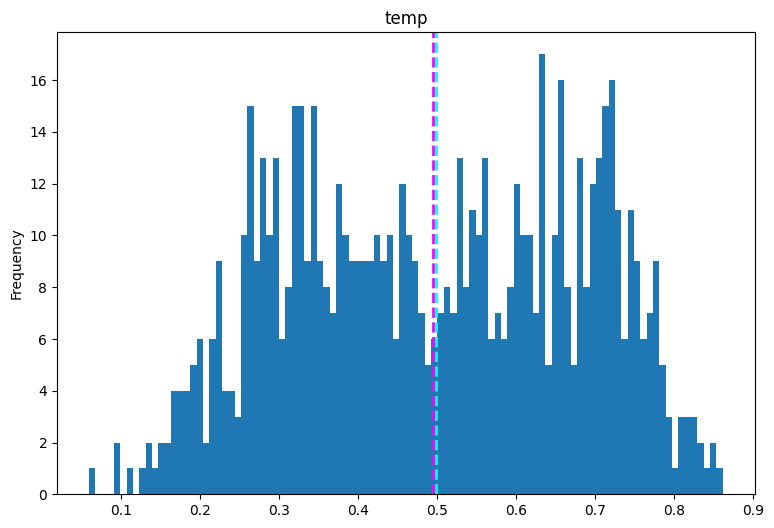

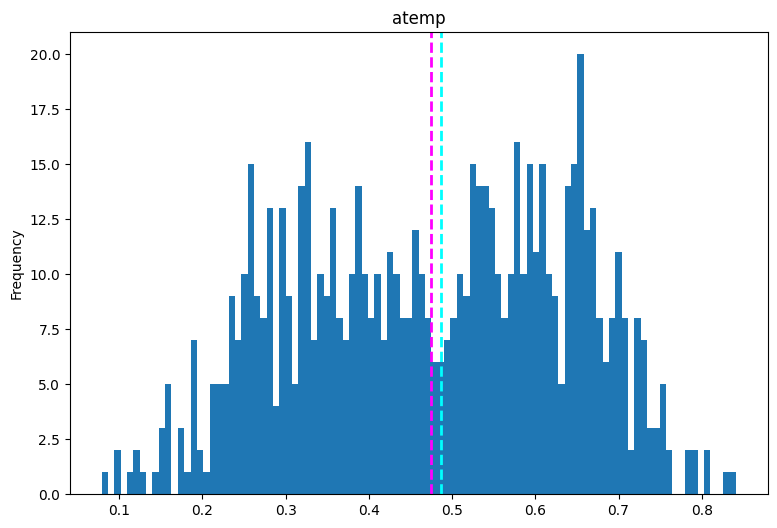

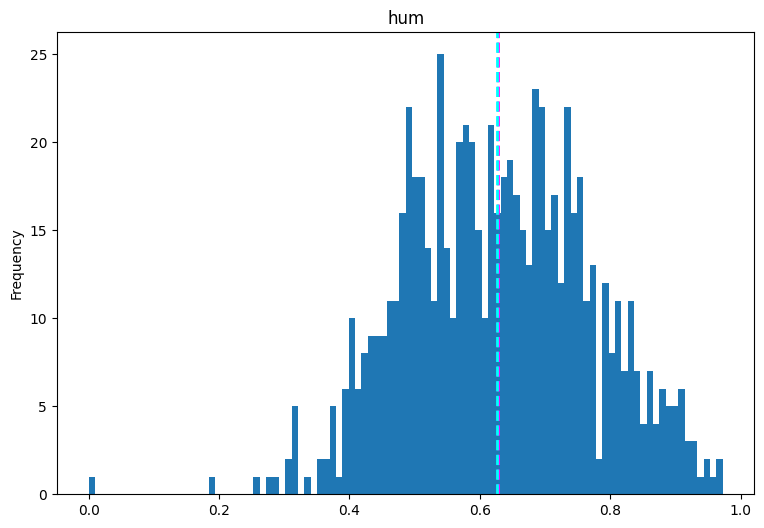

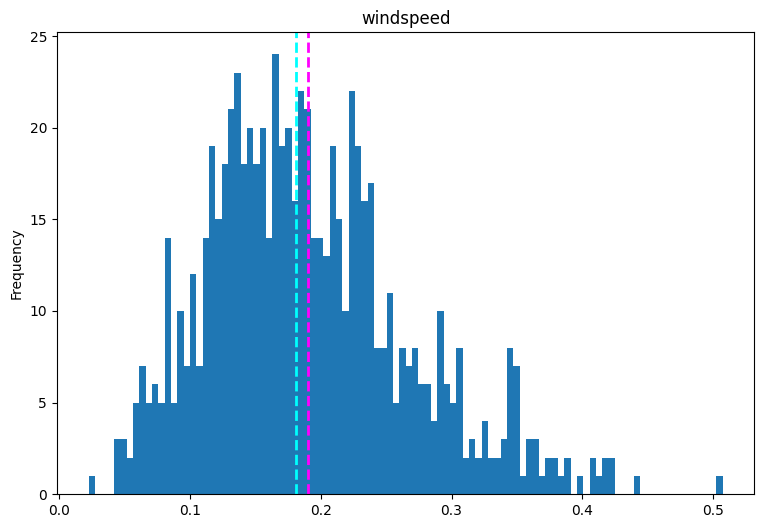

In [7]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    attribute = bike_df[col]
    attribute.plot.hist(bins=100, ax = ax)
    ax.axvline(attribute.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(attribute.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

## Let's check all categorical attributes distributions

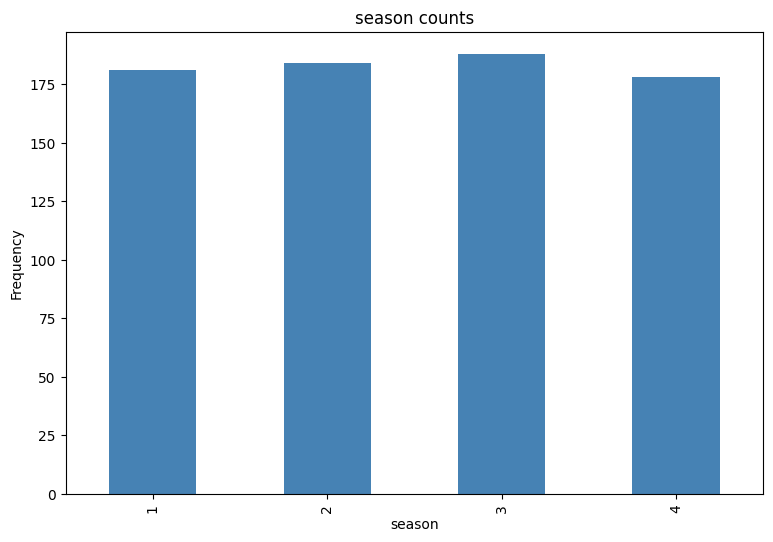

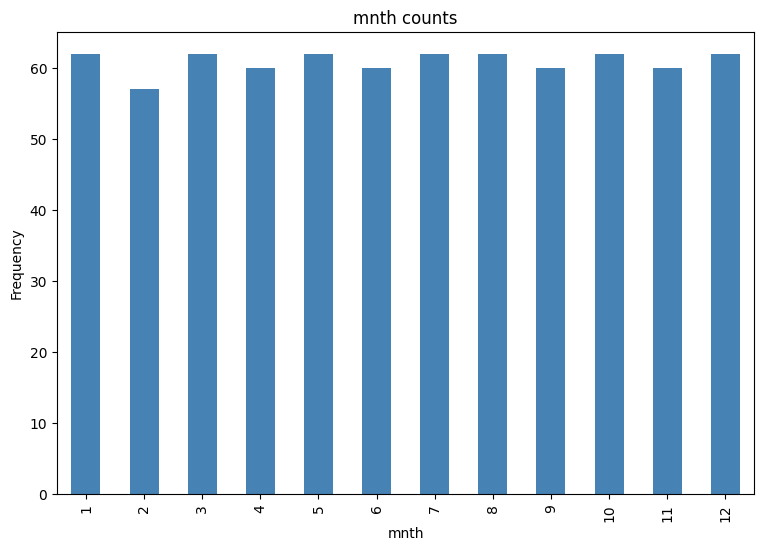

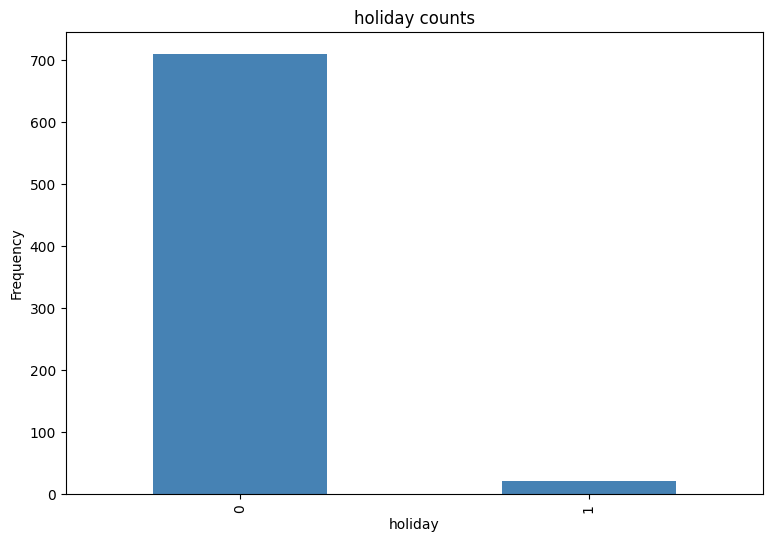

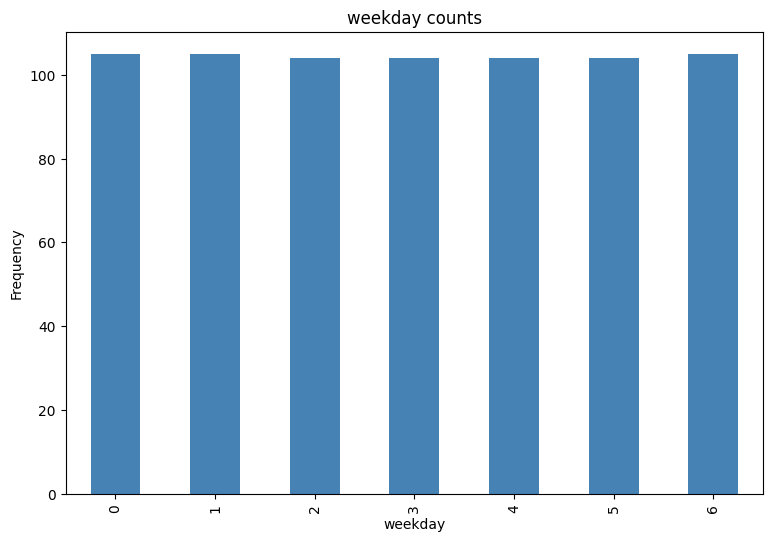

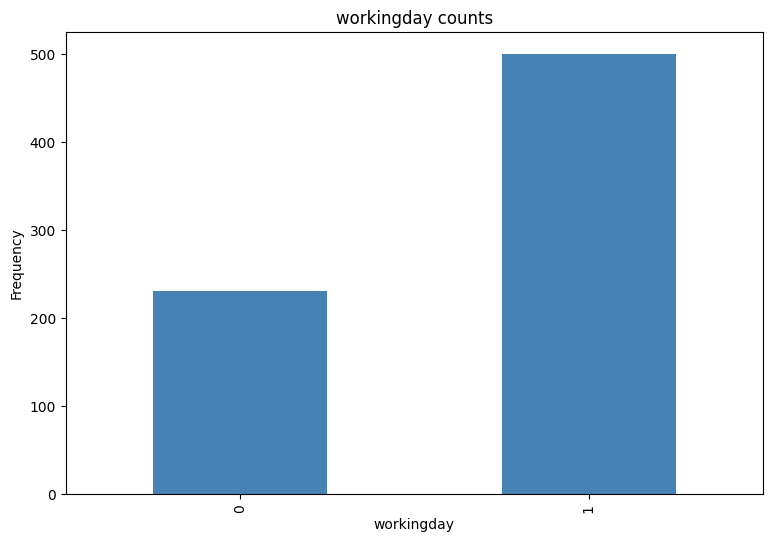

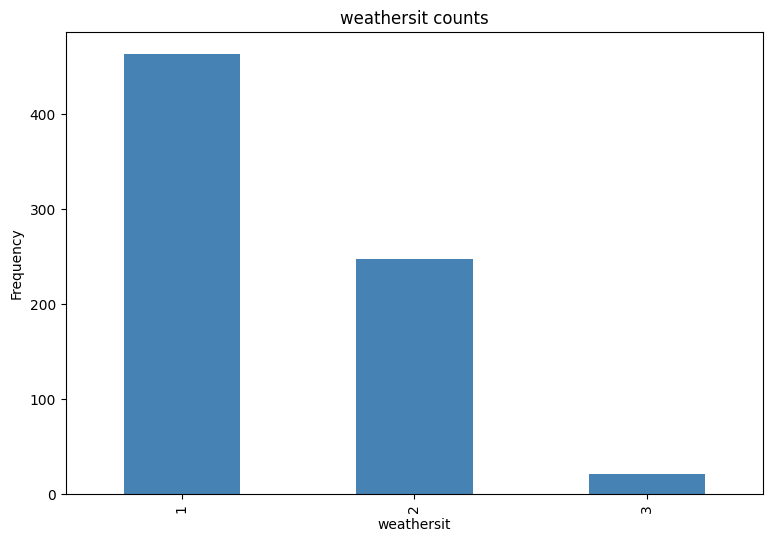

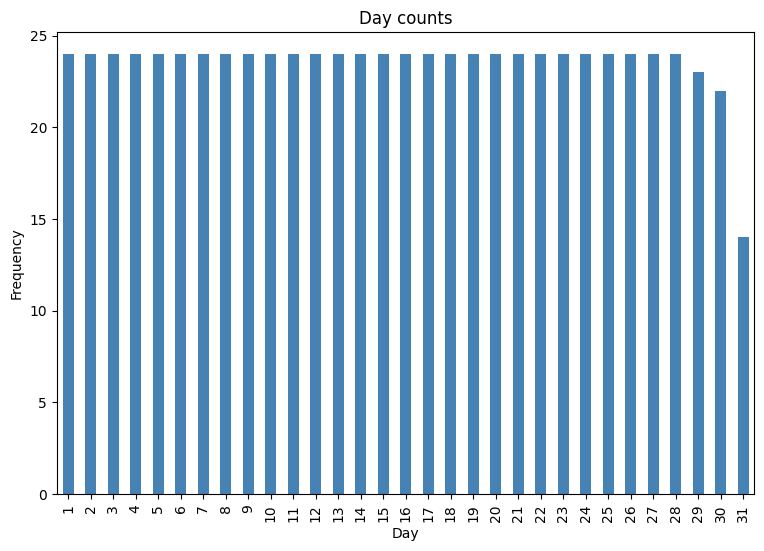

In [8]:
# plot a bar plot for each categorical feature count
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'Day']

for col in categorical_features:
    counts = bike_df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()


### We can also check the correlation of each numerical attribute against the rentals.

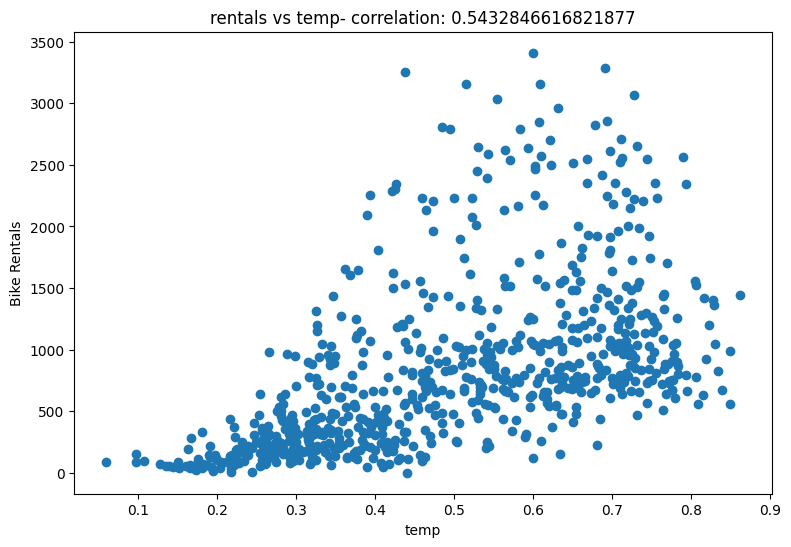

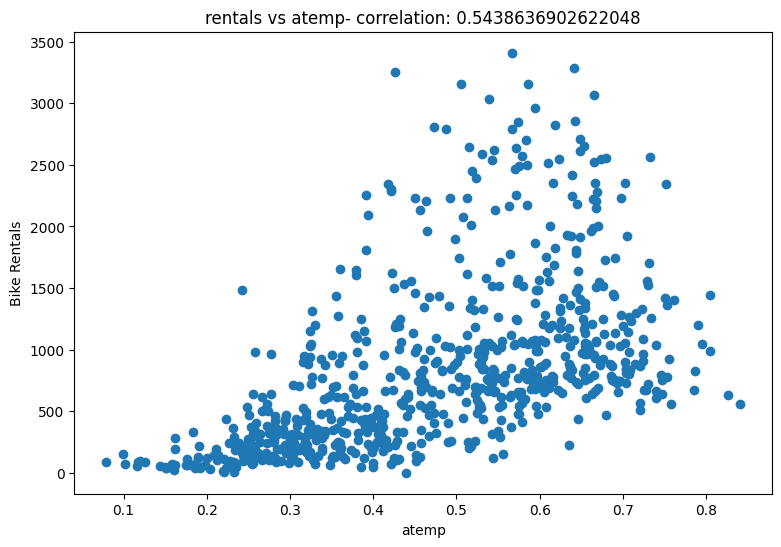

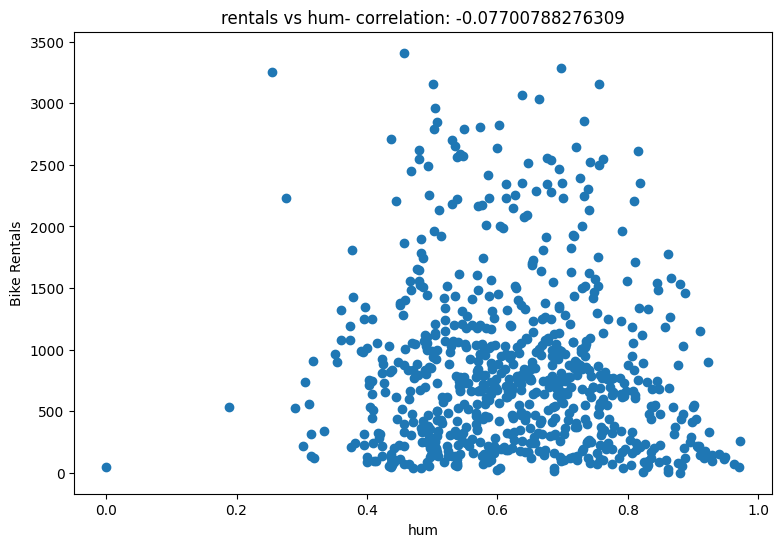

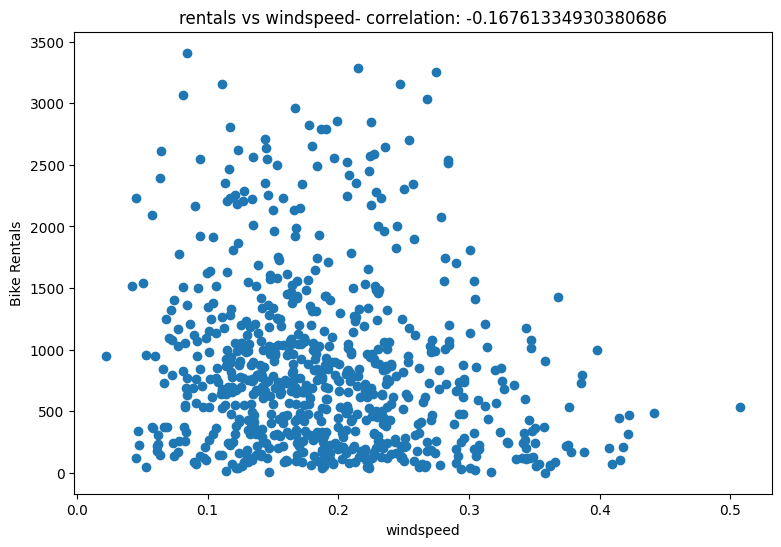

In [9]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    label = bike_df['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

### Now the categorical attributes against the rentals

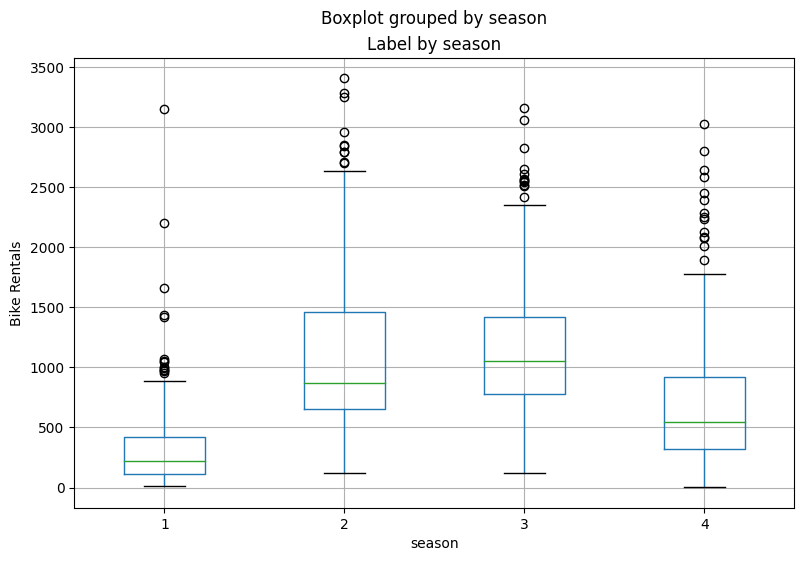

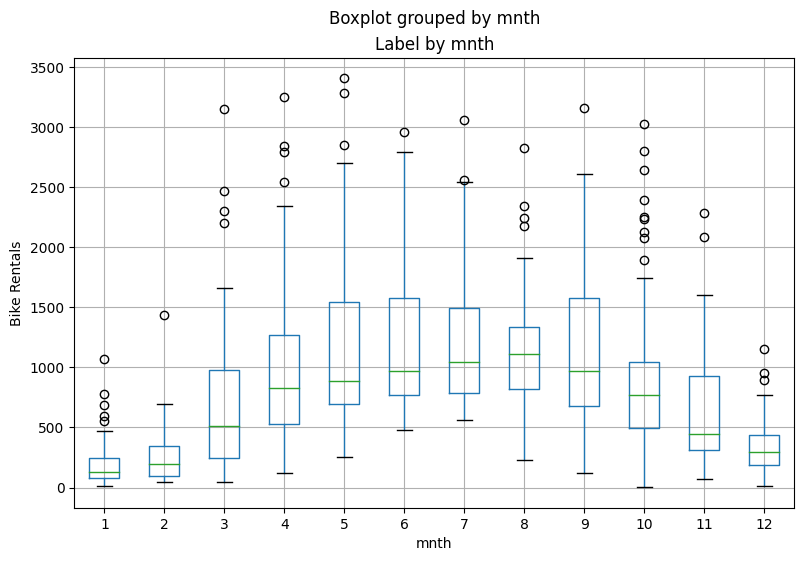

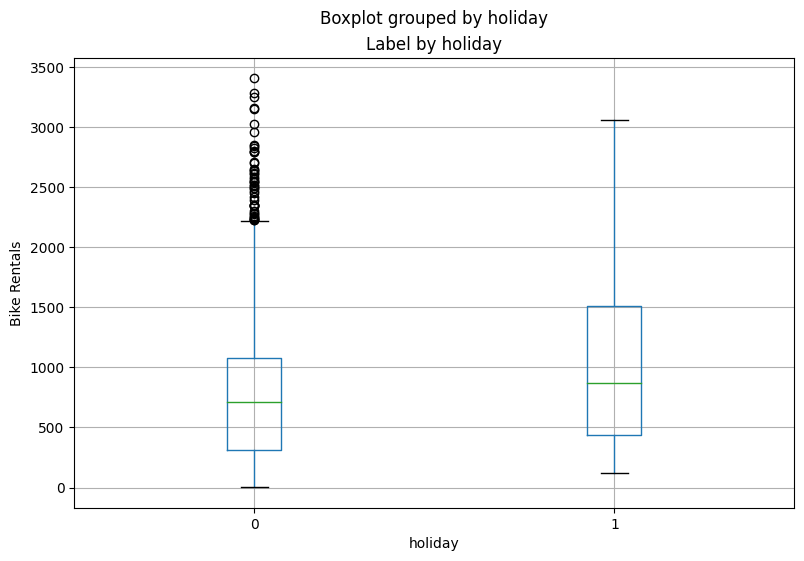

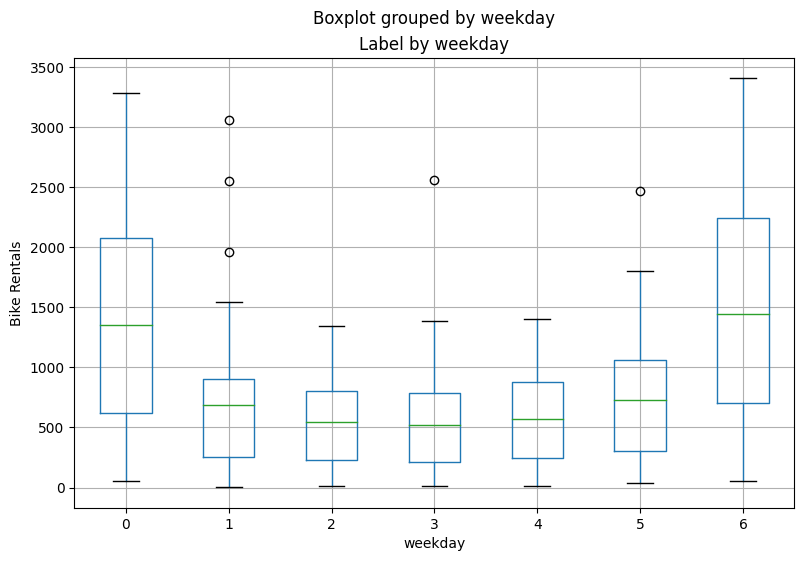

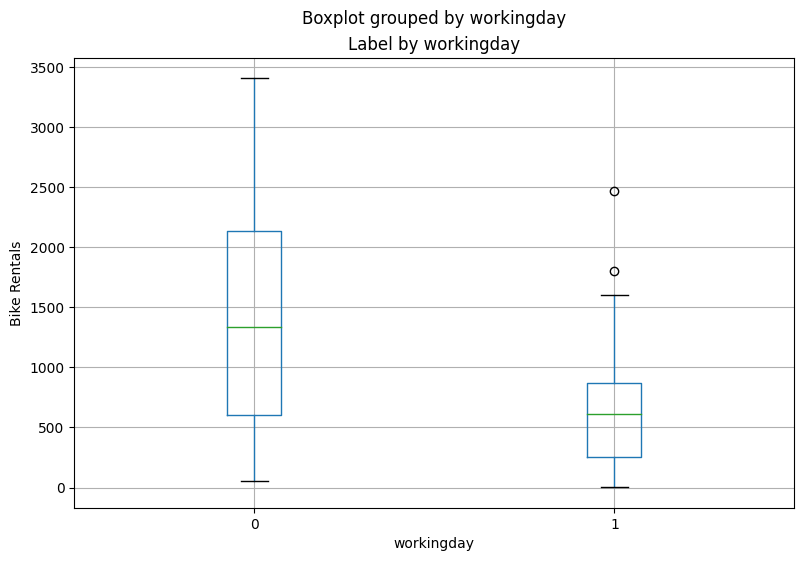

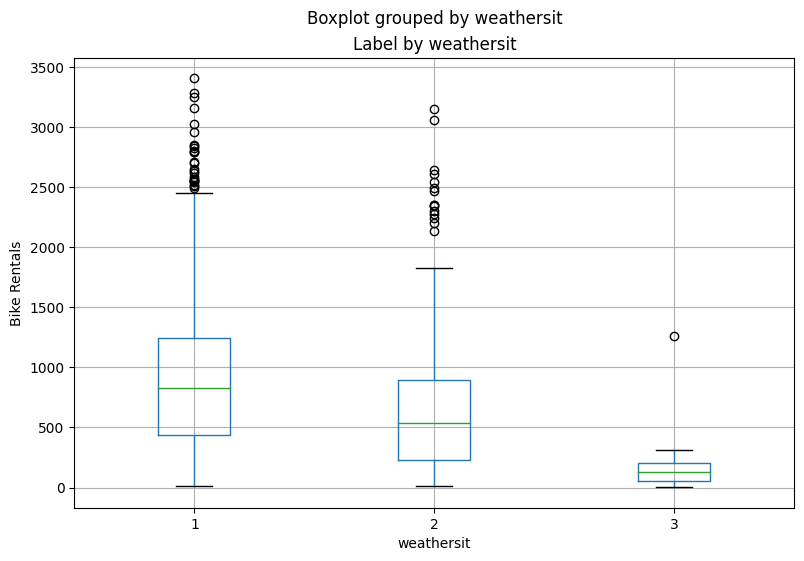

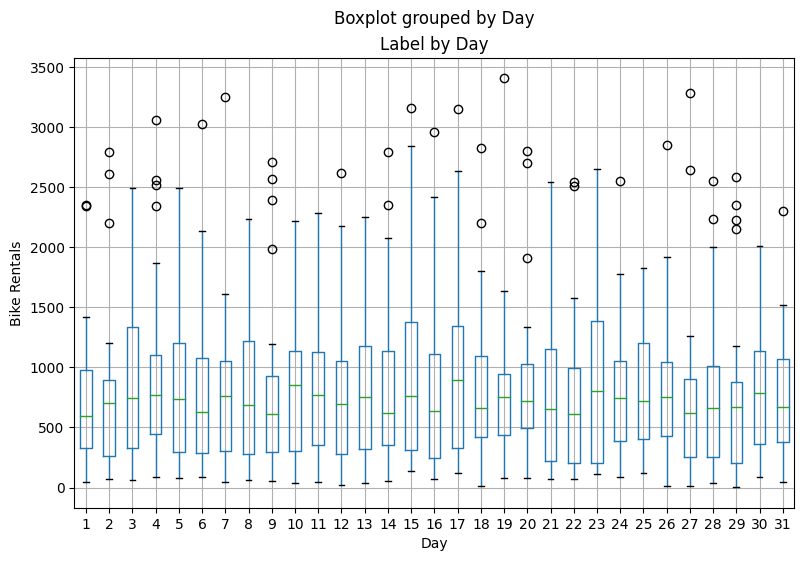

In [10]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_df.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

So we have generated some plots. But which are the insghts behind them?

* The frequency of rentals seems season-variant, with way higher values along the spring and summer, compared to those of winter and autumn. There are 2 plots actually stating this.
* We could expect a higher number of Bike rentals in the first weeks of the months, since people may have a higher income to be spent, but it is not the case in this dataset.
* However, the amount of Bike rentals seem to behave different depending on the weather as well as on the weekday vs weekend, with higher values when sunny and sundays.
* Also, there seems to be a positive correlation between temperature and rentals. Let's check it out.

## Training a Multilinear Regression Model and Ridge Regression

### 1. Prepare the tranining and test data sets

In [41]:
# Separate features and labels
# into numpy arrays named X containing the features, and y containing the labels
X, y = bike_df[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']], bike_df['rentals']
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
   season  mnth  holiday  weekday  workingday  weathersit      temp     atemp  \
0       1     1        0        6           0           2  0.344167  0.363625   
1       1     1        0        0           0           2  0.363478  0.353739   
2       1     1        0        1           1           1  0.196364  0.189405   
3       1     1        0        2           1           1  0.200000  0.212122   
4       1     1        0        3           1           1  0.226957  0.229270   
5       1     1        0        4           1           1  0.204348  0.233209   
6       1     1        0        5           1           2  0.196522  0.208839   
7       1     1        0        6           0           2  0.165000  0.162254   
8       1     1        0        0           0           1  0.138333  0.116175   
9       1     1        0        1           1           1  0.150833  0.150888   

        hum  windspeed  
0  0.805833   0.160446  
1  0.696087   0.248539  
2  0.437273   0.248309 

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


### 2. Model - Linear vs Ridge Regression

In [40]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression().fit(X_train, y_train)
print (linear_regression_model)

predictions = linear_regression_model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

from sklearn.linear_model import Ridge as RidgeRegression

ridge_regression_model = RidgeRegression().fit(X_train, y_train)
print (ridge_regression_model)

predictions_ridge = ridge_regression_model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions_ridge)[:10])
print('Actual labels   : ' ,y_test[:10])

LinearRegression()
Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]
Ridge()
Predicted labels:  [1883. 1166.  964.  -24.  297.  384.  505.  610. 1460.  -13.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


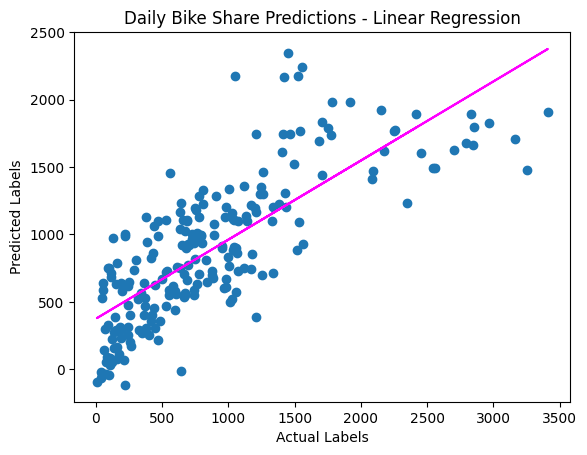

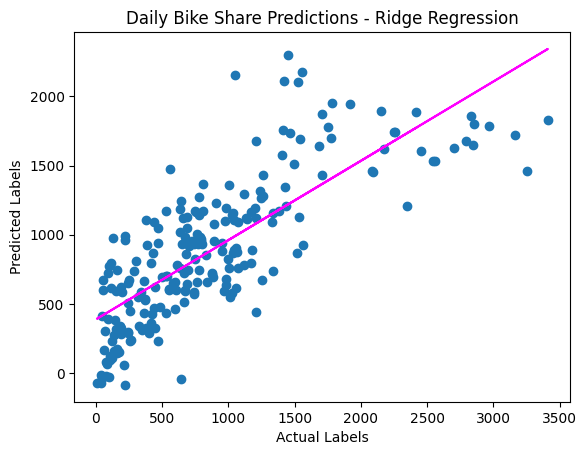

In [28]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Linear Regression')
# highlight the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

plt.scatter(y_test, predictions_ridge)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Ridge Regression')
# highlight the regression line
z = np.polyfit(y_test, predictions_ridge, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


##### There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line;
##### but there's a fair amount of difference between the ideal function represented by the line and the results.
##### This variance represents the residuals of the model.

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression Error Metrics:")
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

print("\nRidge Regression Error Metrics:")
mse_ridge = mean_squared_error(y_test, predictions_ridge)
print("MSE:", mse_ridge)

rmse_ridge = np.sqrt(mse_ridge)
print("RMSE:", rmse_ridge)

r2_ridge = r2_score(y_test, predictions_ridge)
print("R2:", r2_ridge)

Linear Regression Error Metrics:
MSE: 201972.55947035612
RMSE: 449.4135728595167
R2: 0.6040454736919186

Ridge Regression Error Metrics:
MSE: 198661.35205170492
RMSE: 445.7144288125581
R2: 0.6105368880127451


* Given the R2 metrics and the 2 models, we can appreciate a lower MSE when using Ridge, supported by a slightly more accurate model with an R2 of 0.61 in comparison to 0.60. 
* Since the accuracy does not increase considerably when using Ridge, I'd still use a Linear Regression.
* The simpler the model, the easier it is to be understood by the stakeholders, as long as we don't loose accuracy significantly.

The coefficient for season is 71.75356437742097
The coefficient for mnth is -14.597009901969948
The coefficient for holiday is -315.7094711453227
The coefficient for weekday is 11.357365936738738
The coefficient for workingday is -838.1540623234853
The coefficient for weathersit is -46.76224000146207
The coefficient for temp is 2004.338958617578
The coefficient for atemp is -32.690333229783384
The coefficient for hum is -553.3161647453318
The coefficient for windspeed is -1229.4925922370342


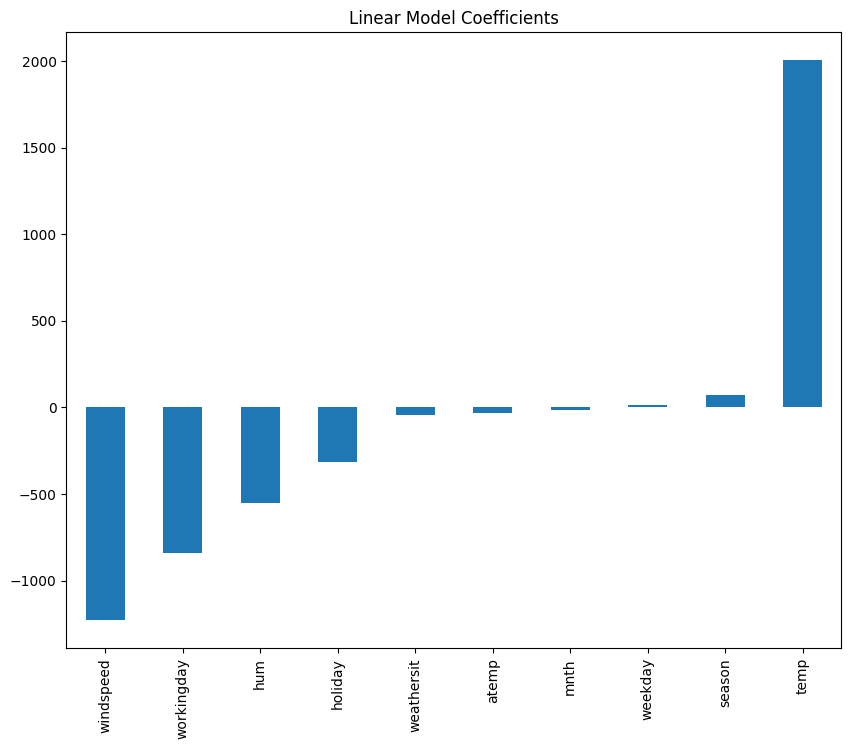

In [47]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear_regression_model.coef_[idx]))


#checking the magnitude of coefficients
from pandas import Series, DataFrame
predictors = X_train.columns
 
coef = Series(linear_regression_model.coef_.flatten(), predictors).sort_values()
plt.figure(figsize=(10,8))
 
coef.plot(kind='bar', title='Linear Model Coefficients')
plt.show()

The coefficient for season is 76.4601659498276
The coefficient for mnth is -14.911881920350492
The coefficient for holiday is -284.4403474112652
The coefficient for weekday is 12.239536128613958
The coefficient for workingday is -821.9252250820109
The coefficient for weathersit is -78.8408857683896
The coefficient for temp is 1162.990479542368
The coefficient for atemp is 836.2832457591709
The coefficient for hum is -395.2837046079181
The coefficient for windspeed is -836.3673983085478


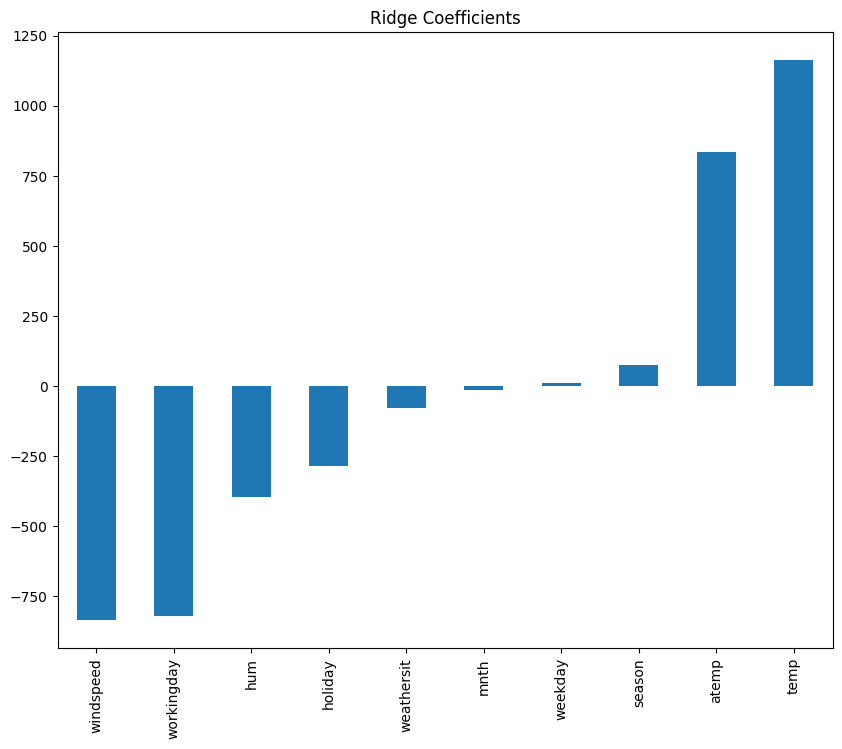

In [46]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, ridge_regression_model.coef_[idx]))


#checking the magnitude of coefficients
from pandas import Series, DataFrame
predictors = X_train.columns
 
coef = Series(ridge_regression_model.coef_.flatten(), predictors).sort_values()
plt.figure(figsize=(10,8))
 
coef.plot(kind='bar', title='Ridge Coefficients')
plt.show()